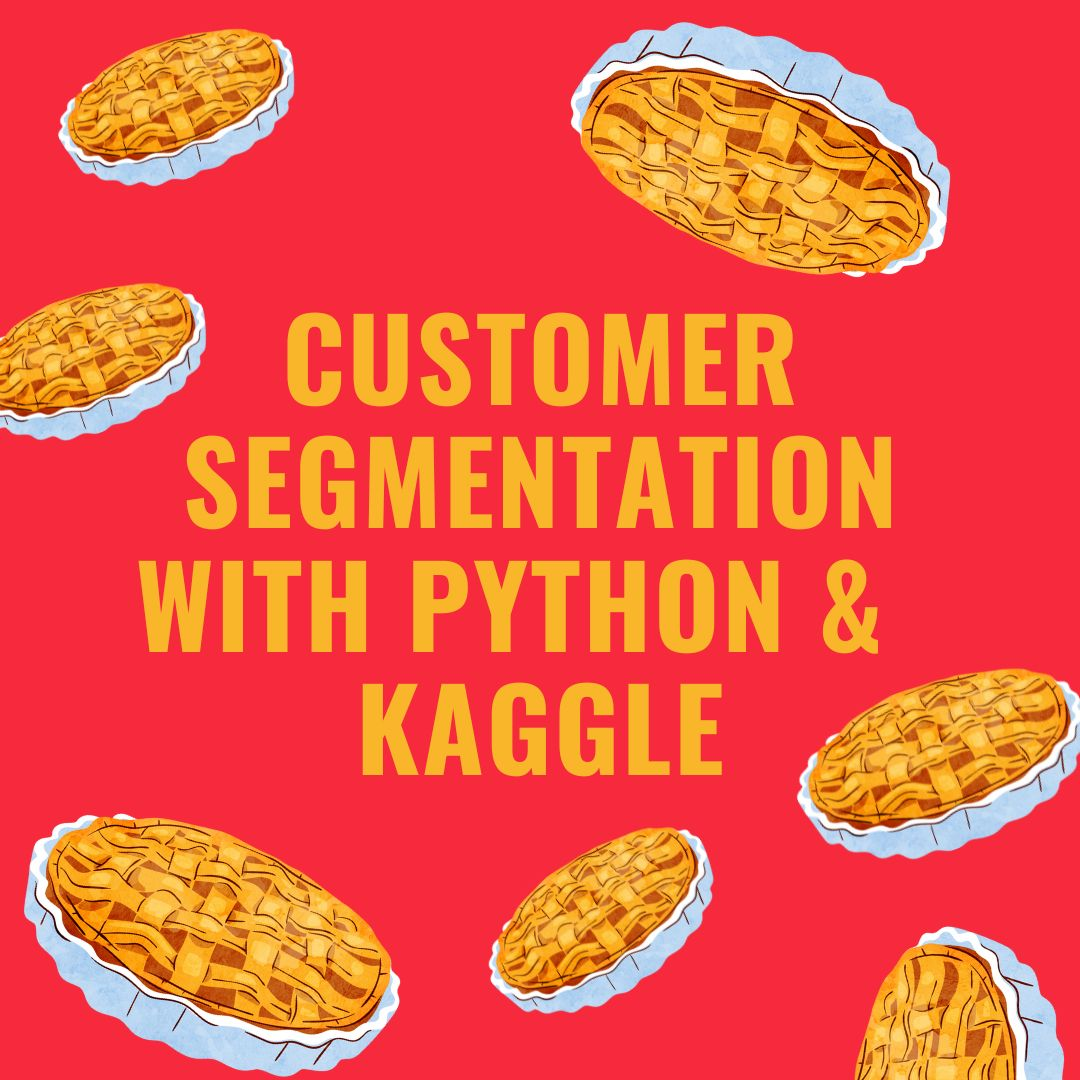

In [50]:
from IPython.display import Image
Image(filename='banner.jpg', width=800, height=800)

## Step 1: Download Kaggle dataset into Jupyter notebook

#### 1.1 Find a Kaggle dataset you want to download, [this one](https://www.kaggle.com/datasets/thedevastator/predicting-credit-card-customer-attrition-with-m?select=BankChurners.csv) will be used during the meetup. 

You can also download the dataset directly onto your computer, place it in the same folder as your Jupyter notebook and just read it in via Pandas. Here's an alternative using Kaggle's API to keep your machine clutterfree. ✨

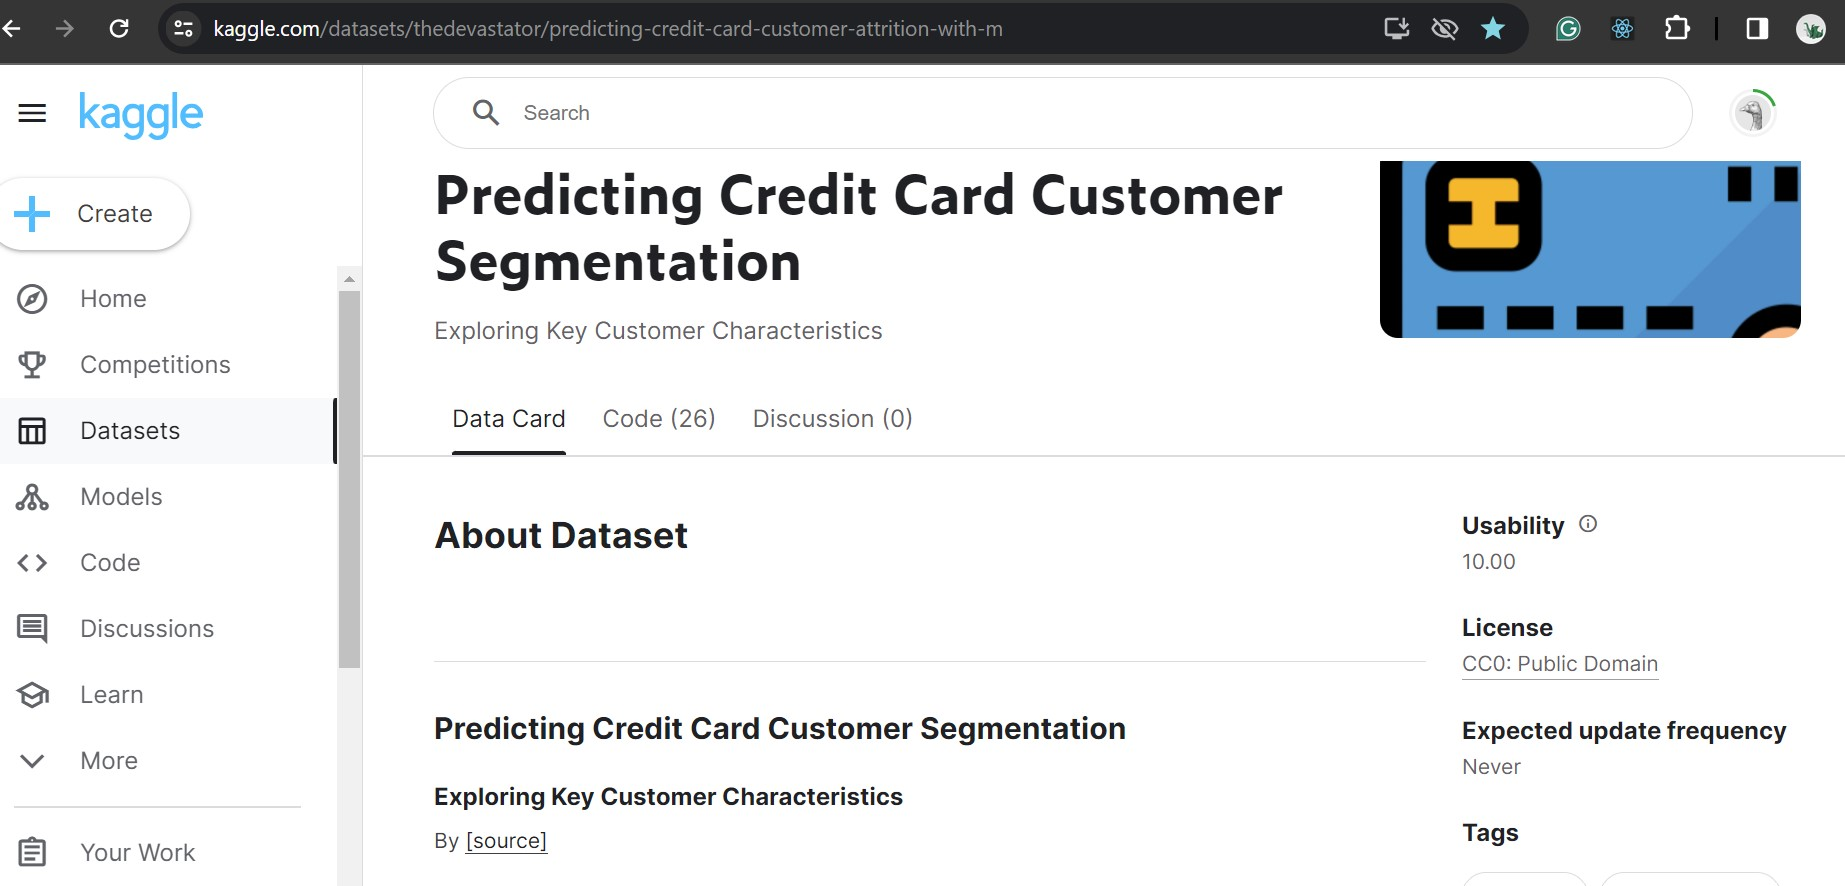

In [51]:
Image(filename='pick.jpg')

#### 1.2 Install opendatasets **pip install opendatasets** and Kaggle **pip install kaggle** from your terminal, then import them 


In [52]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import os
import opendatasets as od
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#### 1.3 Go to Kaggle dashboard > Settings > API > Create New Token > download token (comes as a little JSON).

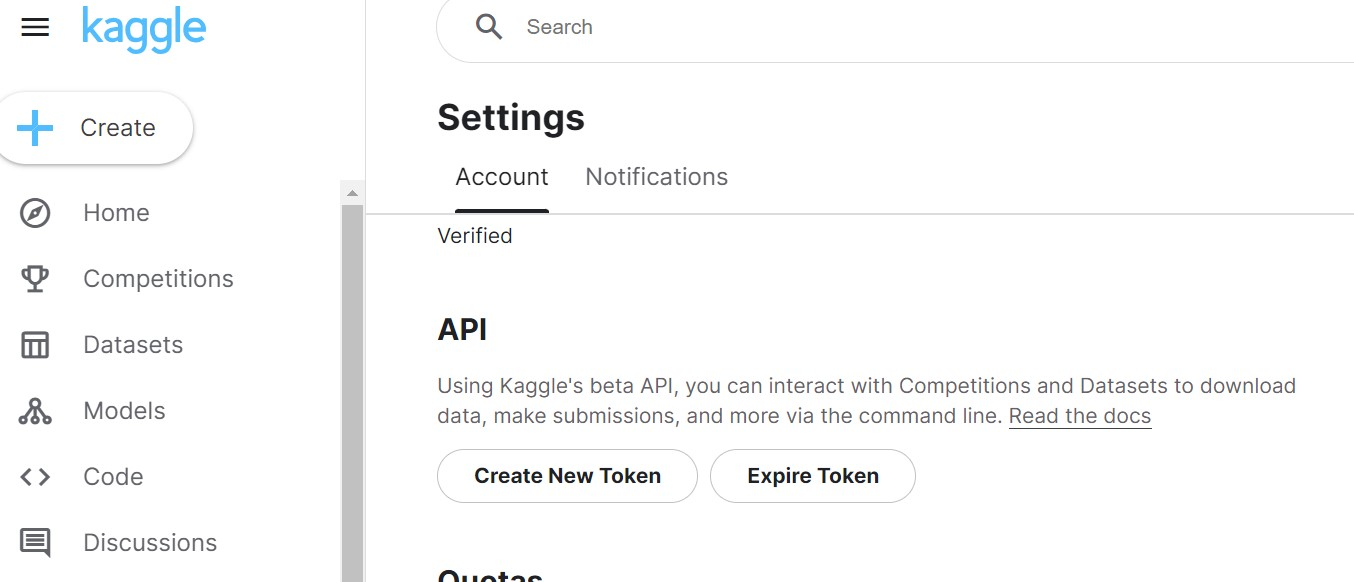

In [5]:
Image(filename='kaggleAPI.jpg')

Copy it into the same folder as your Python environment site package, in my case I am using Python 3.11 and the path where to copy token is C:\Users\laura\3.11.0\Lib\site-packages.

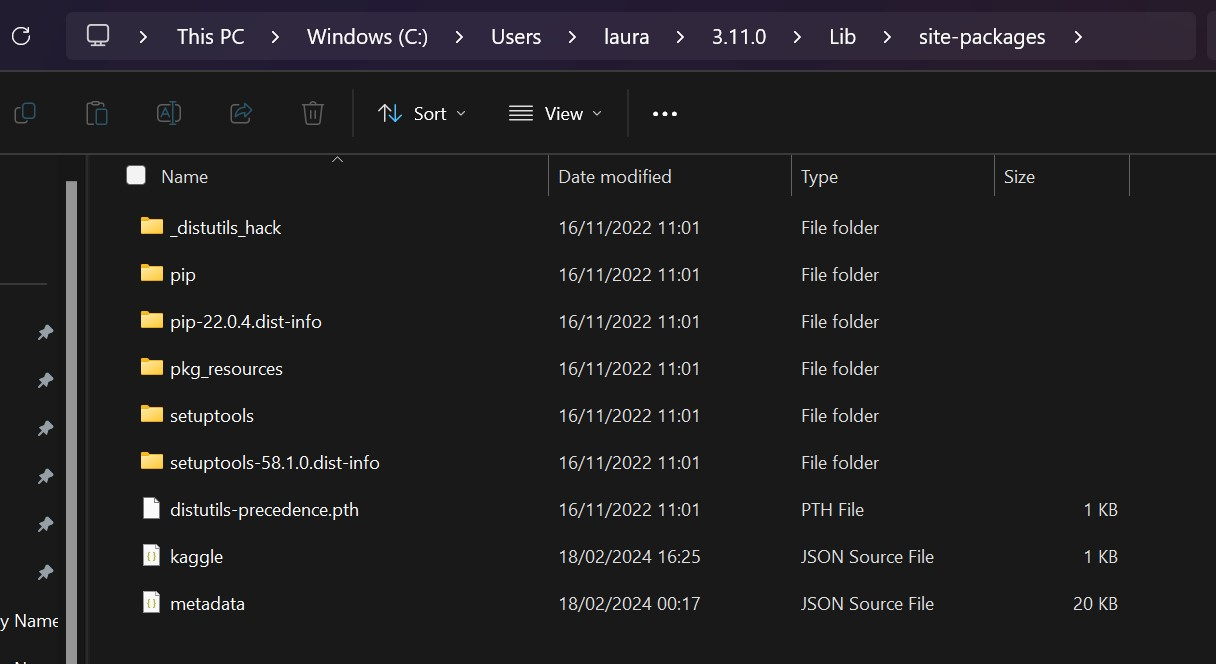

In [34]:
Image(filename='packages.jpg')

#### 1.4 Define your url as a string variable

In [7]:
dataset_url = 'https://www.kaggle.com/datasets/thedevastator/predicting-credit-card-customer-attrition-with-m?select=BankChurners.csv'

#### 1.5 Download your dataset and enter credentials from your Kaggle API token 🎫

In [8]:
od.download(dataset_url)

Skipping, found downloaded files in ".\predicting-credit-card-customer-attrition-with-m" (use force=True to force download)


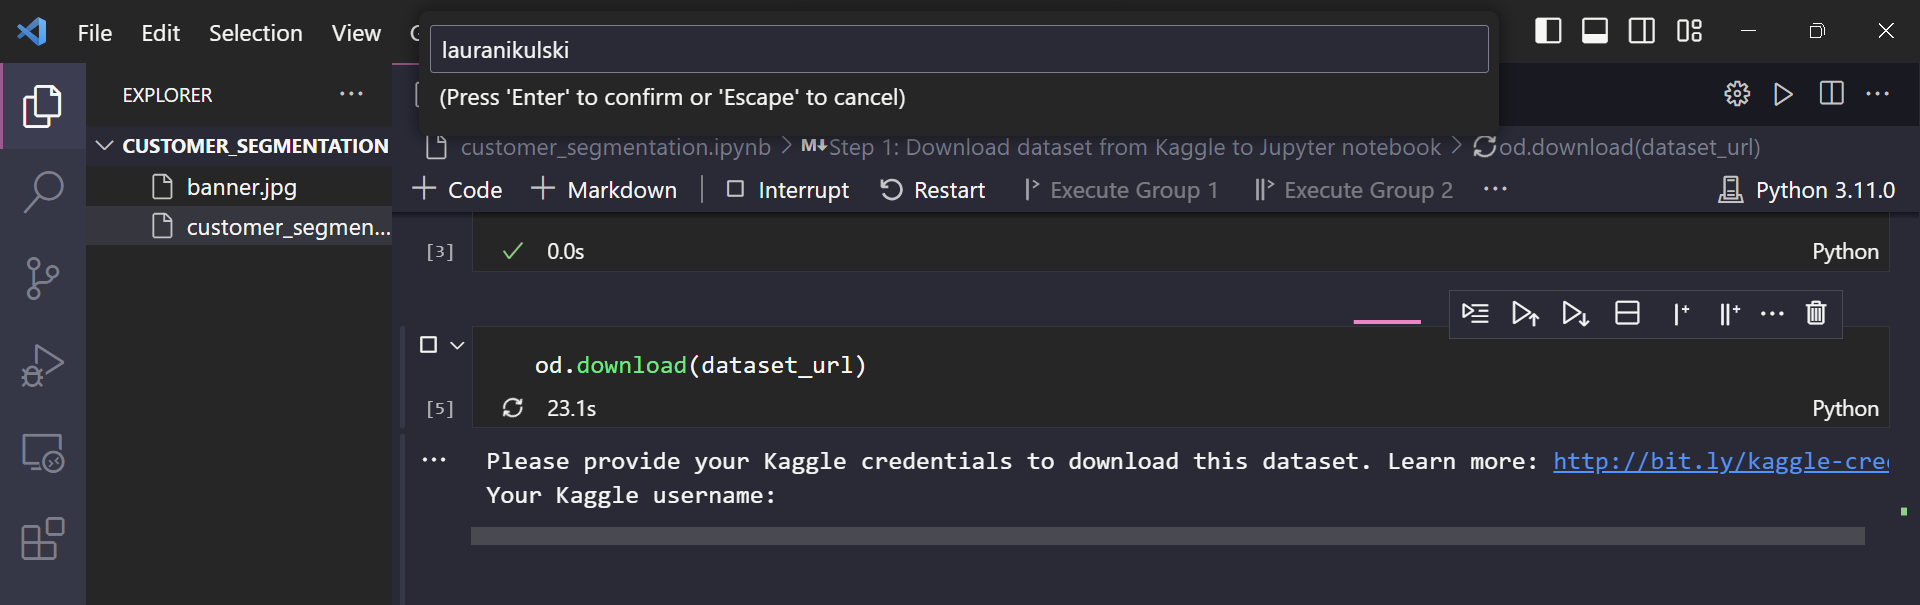

In [9]:
Image(filename='entercredentials.png')

#### 1.6 Create a directory from URL (the part after uploader's username but before CSV filename) and list the files within the directory. 

In [10]:
directory = './predicting-credit-card-customer-attrition-with-m'

In [11]:
os.listdir(directory)

['BankChurners.csv']

#### 1.7 Find the file you wish to analyse within the directory and read it into Jupyter notebook using Pandas. 

In [12]:
df = pd.read_csv('predicting-credit-card-customer-attrition-with-m/BankChurners.csv')

#### 1.8 Have a quick look using .head() to make sure everything's worked 🎊

In [13]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


## Step 2. Explore and Clean Data

 From the head, it looks like some column names are overly long and make exploration a bit annoying. Those are renamed. 

In [14]:
df = df.rename(columns={'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1': 'NaiveBayes_InactiveMon1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'NaiveBayes_InactiveMon2'})

In [15]:
# datatypes seem to check out according to column names
# int64 means integers, float64 means floating point numbers, object means text strings
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
NaiveBayes_InactiveMon1     float64
NaiveBayes_InactiveMon2     float64
dtype: object

In [16]:
# data appears complete 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [17]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,NaiveBayes_InactiveMon1,NaiveBayes_InactiveMon2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [18]:
df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
NaiveBayes_InactiveMon1     0
NaiveBayes_InactiveMon2     0
dtype: int64

> According to the dataset's Kaggle source, this is what each column contains: 

- CLIENTNUM: Unique identifier for each customer.
- Attrition_Flag: Flag indicating whether or not the customer has churned out.
- Customer_Age: Age of customer. 
- Gender: Gender of customer. 
- Dependent_count: Number of dependents that customer has.
- Education_Level: Education level of customer. 
- Marital_Status: Marital status of customer. 
- Income_Category: Income category of customer. 
- Card_Category: Type of card held by customer.
- Months_on_book: How long customer has been on the books. 
- Total_Relationship_Count: Total number of relationships customer has with the credit card provider. [???]
- Months_Inactive_12_mon: Number of months customer has been inactive in the last twelve months. 
- Contacts_Count_12_mon: Number of contacts customer has had in the last twelve months. 
- Credit_Limit: How much you can charge to your credit card per month. 
- Total_Revolving_Bal: The amount of money that is carried over every month.
- Avg_Open_To_Buy: Average open to buy ratio of customer. 
- Total_Amt_Chng_Q4_Q1: Total amount changed from quarter 4 to quarter 1.
- Total_Trans_Amt: Total transaction amount. 
- Total_Trans_Ct: Total transaction count. 
- Total_Ct_Chng_Q4_Q1: Total count changed from quarter 4 to quarter 1.
- Avg_Utilization_Ratio: Average utilization ratio of customer. 
- Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Ecation_Level_Months_Inactive_12_mon_1: Naive Bayes classifier for predicting whether or not someone will churn

In [19]:
# several columns do not interest me, drop those 
df.drop(['CLIENTNUM','Avg_Open_To_Buy','Avg_Utilization_Ratio', 'NaiveBayes_InactiveMon1', 'NaiveBayes_InactiveMon2'],axis=1,inplace=True)

In [20]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1'],
      dtype='object')

In [21]:
# attrited customer means lost customer
df.Attrition_Flag.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [22]:
df.Income_Category.value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [23]:
# the vast majority of customers have the most basic card and higher 
# levels do not seem to match the amounts pf high income earning customers. 
# Is it difficult to get to special levels at this bank?
df.Card_Category.value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

## Step 3. Preprocessing & Segmentation
#### Step 3.1 Customer sampling limitations

In my case, I would like to generally learn more about lost customers so I can find out more about what they have in common or how they are different from existing customers, why were they lost, in an effort to prevent or minimise future losses. 

This dataset features a lot more existing than lost customers. 
Oversampling attrited customers may introduce bias, therefore I am undersampling existing customers.

I will proceed with juxtaposing each group and compare patterns. If there are glaring differences, correlation can be calculated. 

#### Step 3.2 Separate existing from lost customers 

In [41]:
# create a Boolean mask for the rows to remove
existing_mask = df['Attrition_Flag'] == 'Existing Customer'

In [25]:
# select all rows except the ones that contain 'Existing Customer' in place
df_attrited = df[~existing_mask]

In [26]:
df_existing = df[existing_mask].sample(n=len(df_attrited), random_state=42)

#### Step 3.2 Compare customers by feature 

In [27]:
# discrete quantitative variables are unoardered integers, such as number of children
discrete_quantitative_features = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Trans_Ct']


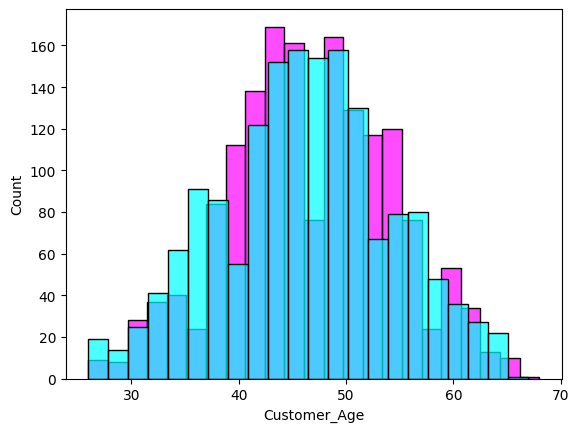

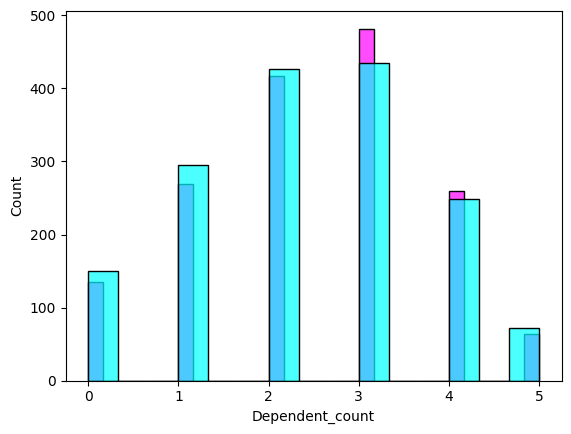

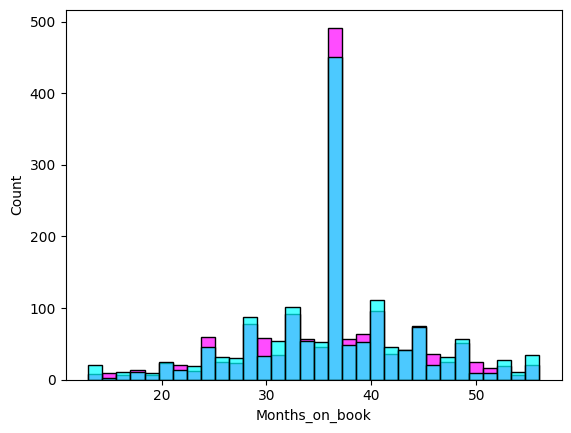

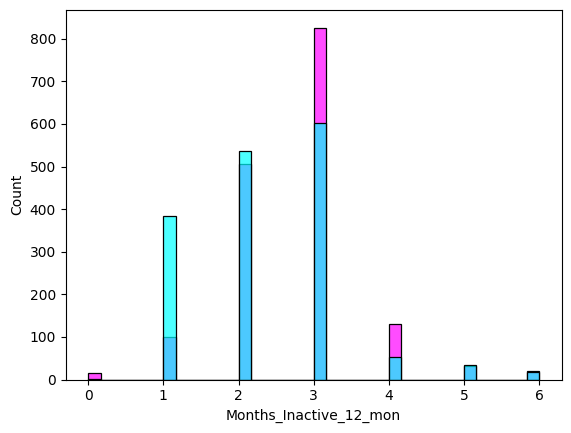

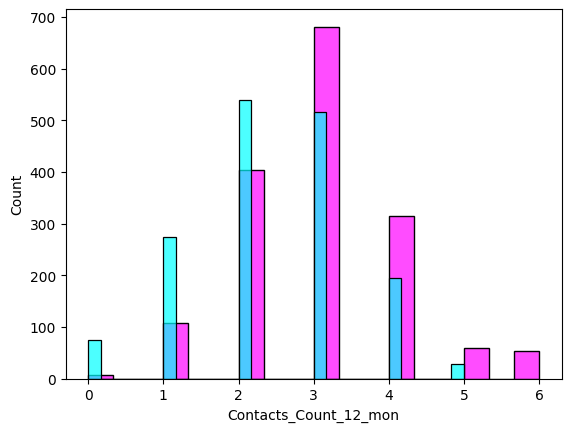

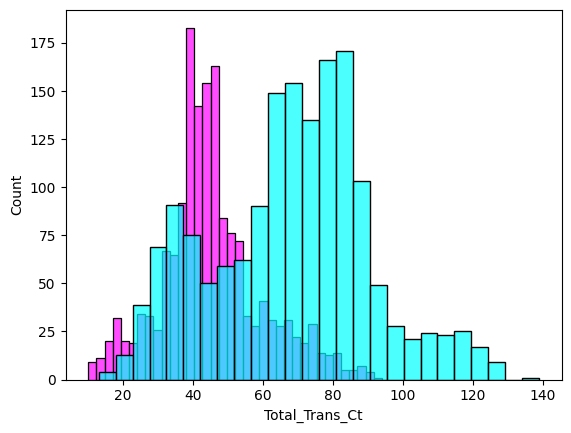

In [28]:
for column in df[discrete_quantitative_features]:
    sns.histplot(df_attrited[column], alpha=0.7, color='magenta')
    sns.histplot(df_existing[column], alpha=0.7, color='cyan')
    plt.show()

In [29]:
# categorical features can be ordinal (ordered, eg strongly agree, agree, neutral) or 
# nominal (unordered, eg email addresses, names)
categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'] 

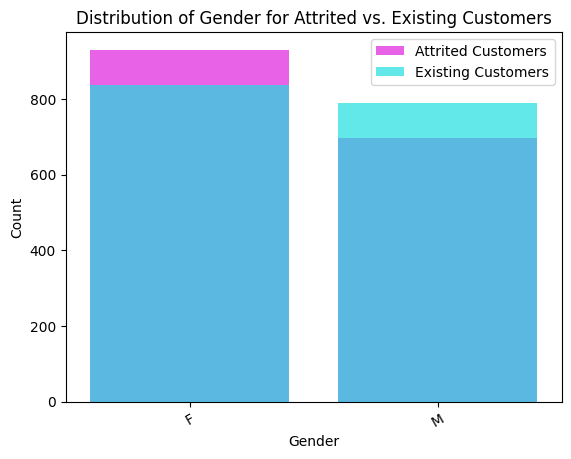

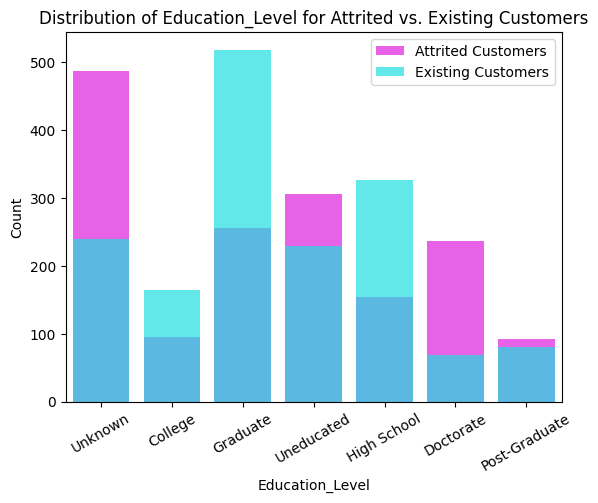

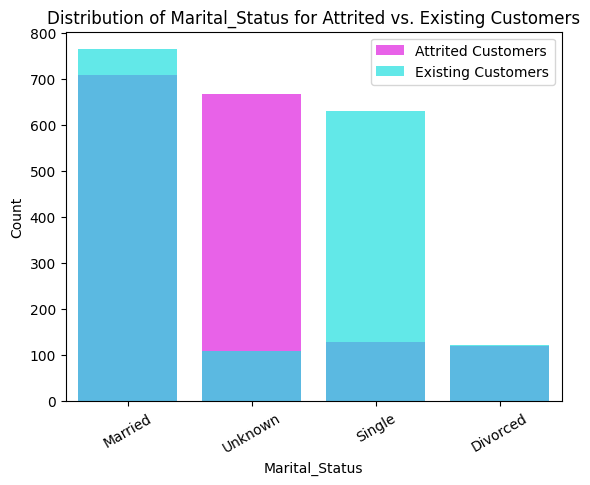

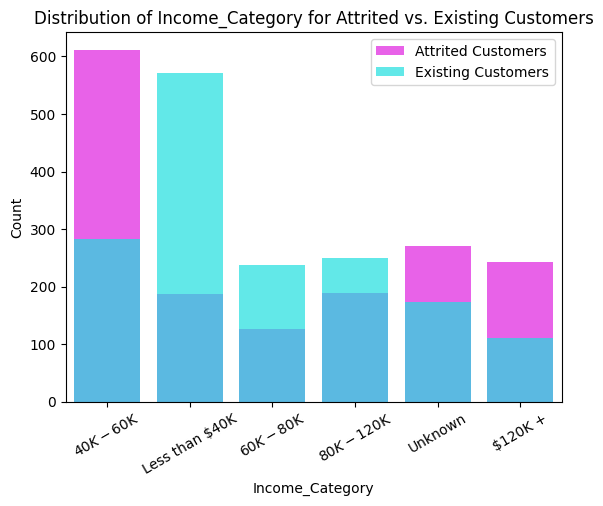

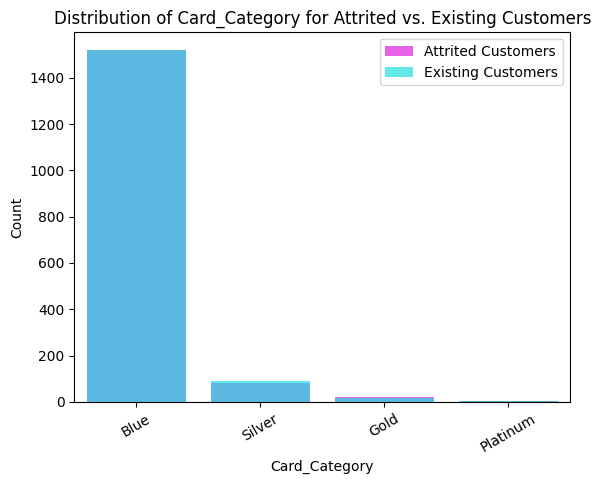

In [30]:
for column in categorical_features:
    sns.countplot(data=df_attrited, x=column, alpha=0.7, color='magenta', label='Attrited Customers')
    sns.countplot(data=df_existing, x=column, alpha=0.7, color='cyan', label='Existing Customers')
    plt.title(f'Distribution of {column} for Attrited vs. Existing Customers')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend()
    plt.xticks(rotation=30)
    plt.show()

In [31]:
# quantitative continuous variables are float numbers, referring to values such as measurements/heights/weights

continuous_quantitative_features = ['Credit_Limit', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1']

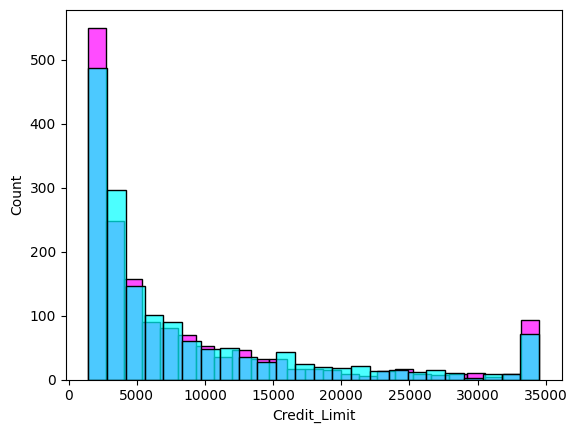

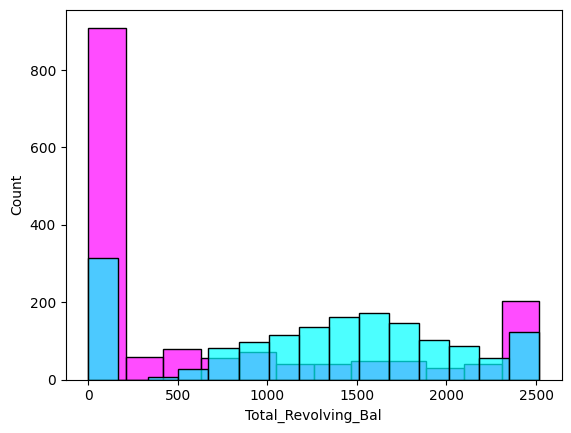

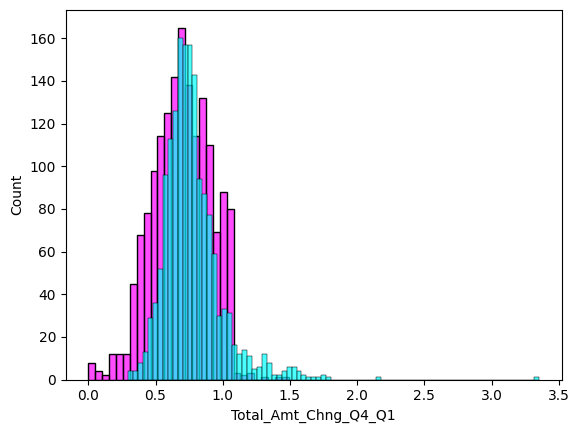

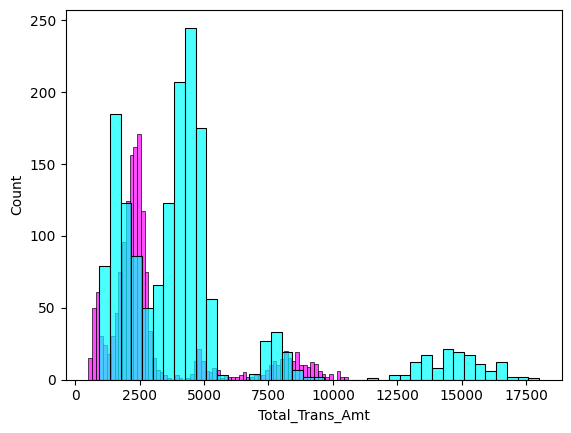

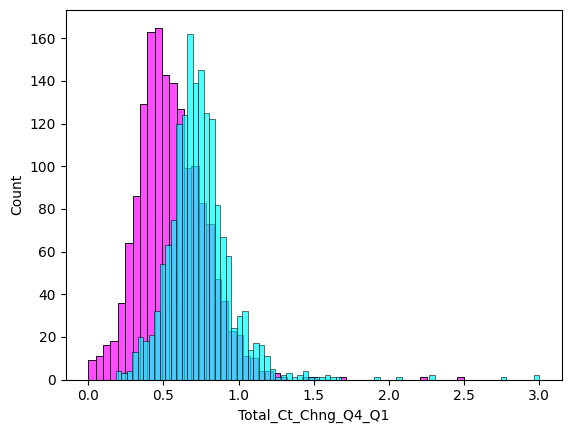

In [32]:
for column in df[continuous_quantitative_features]:
    sns.histplot(df_attrited[column], alpha=0.7, color='magenta')
    sns.histplot(df_existing[column], alpha=0.7, color='cyan')
    plt.show()

Furthermore, you can check for correlation between features, eg if you were interested in building a model to help you predict whether a customer is about to become an attrited customer or not, using correlation coefficients.

Here's how to interpret the values. The closer the correlation coefficient is to 1 or -1, the more the two variables are correlated. 


r=1: Perfect positive correlation. This means that as one variable increases, the other variable also increases in a perfectly linear manner.

r=−1: Perfect negative correlation. This means that as one variable increases, the other variable decreases in a perfectly linear manner.

C:\Users\laura\AppData\Local\Temp\ipykernel_24404\226683158.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr(), dtype=bool))
C:\Users\laura\AppData\Local\Temp\ipykernel_24404\226683158.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_attrited.corr(), annot=True, mask=mask, vmin=-1, vmax=1)


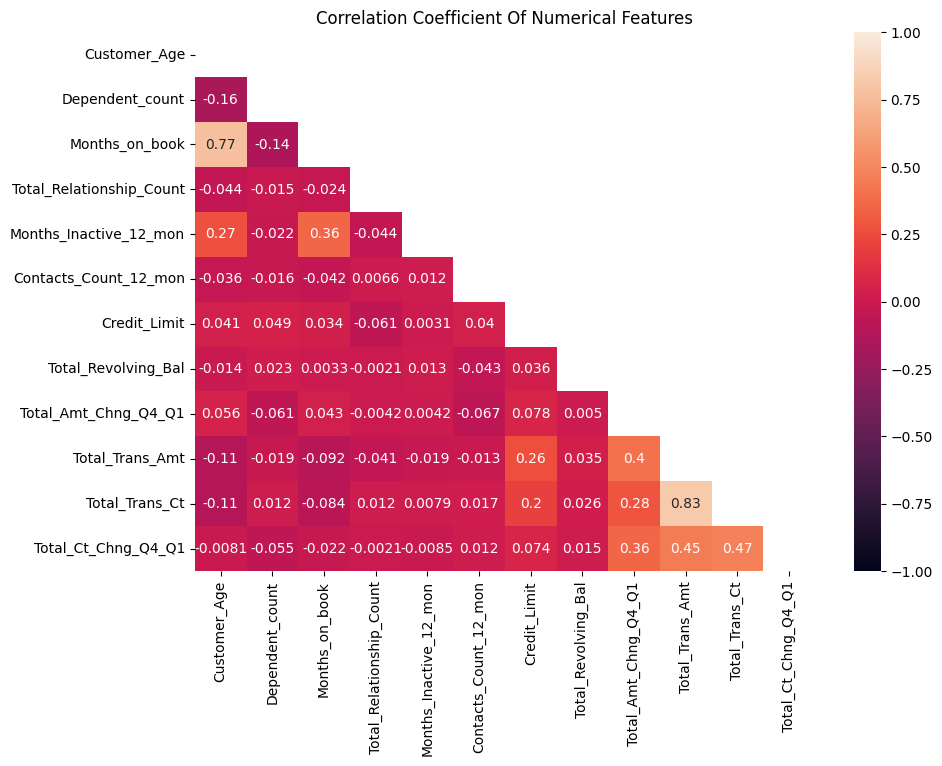

In [44]:
# plot heatmap
plt.figure(figsize=(10,7))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# generate heatmap
sns.heatmap(df_attrited.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Numerical Features')
plt.show()

C:\Users\laura\AppData\Local\Temp\ipykernel_24404\3455263416.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr(), dtype=bool))
C:\Users\laura\AppData\Local\Temp\ipykernel_24404\3455263416.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_existing.corr(), annot=True, mask=mask, vmin=-1, vmax=1)


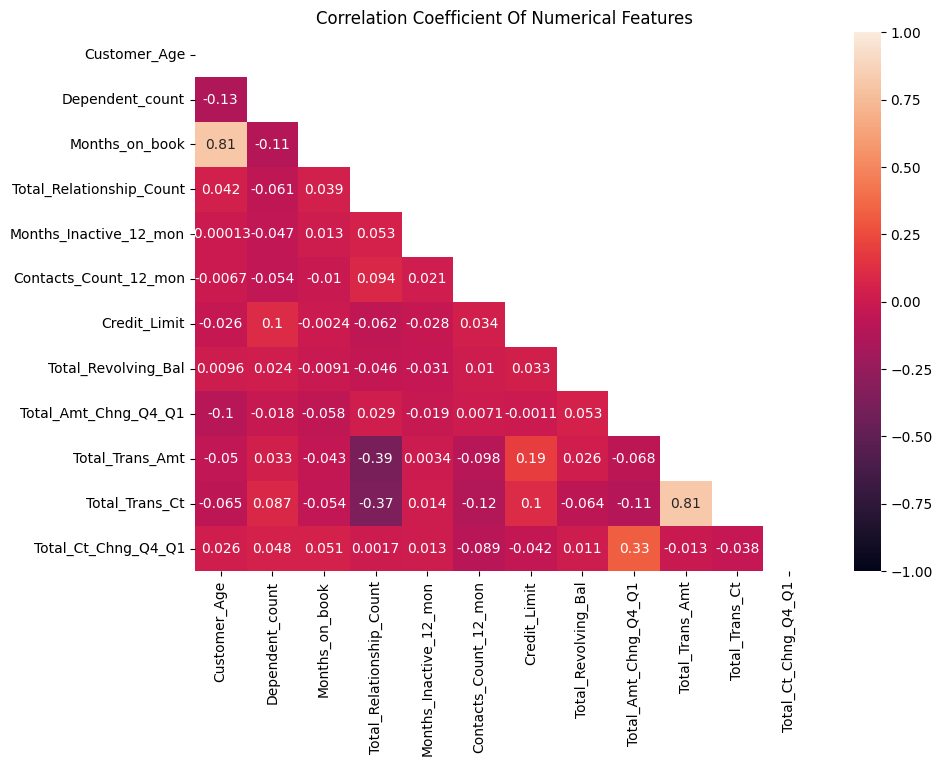

In [45]:
# plot heatmap
plt.figure(figsize=(10,7))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# generate heatmap
sns.heatmap(df_existing.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Numerical Features')
plt.show()

## Conclusion

In a nutshell, if you are a bank and your customer has not used your services in a month or is using your service less than they used to, you need to take action. 

Women, people who are at the extreme ends of the education scale (no education vs doctorate) and people with very high and just about middle class incomes are groups that appear to be somewhat  more likely to churn than others, at first glance. 